# Crop-Fertilizer Recommendation System

## Business Understanding

### Problem Statement :

Farmers face significant challenges in maximizing crop yield, primarily due to the improper selection and application of fertilizers.

Among the challenges farmers face include:
- Crop Selection Uncertainty: Farmers may not know which crops are best suited for their soil and climate conditions, leading to poor yields and economic loss.


- Fertilizer Mismanagement: Incorrect use of fertilizers can result in soil nutrient imbalances, affecting crop health and yield. Farmers may not know the right type or amount of fertilizer required for their crops.


- Plant Disease Identification: Identifying plant diseases can be difficult for farmers, especially without expert knowledge. Delayed or incorrect diagnosis can lead to severe crop damage and lower productivity.

To enhance decision-making, a data-driven recommendation system is needed that provides personalized, actionable insights.

### Objective

The primary goal of this project is to develop an intelligent crop and fertilizer recommendation system that assists farmers in optimizing their farming practices. The system will recommend the most suitable crops and fertilizers based on factors such as soil composition, crop type and weather patterns. By leveraging machine learning and data analytics, the system aims to improve crop yields, reduce costs, and promote sustainable agricultural practices.


### Solutions and Benefits

The solutions the recommendation sytem will provide include:

- Crop Recommendation: By using machine learning to analyze soil data provided by the user, your application can predict the most suitable crops for a specific soil type, enabling farmers to make informed decisions and improve yields.


- Fertilizer Recommendation: Based on the user's soil data and the type of crop they are growing, the application can recommend the appropriate fertilizer by identifying any deficiencies or excess nutrients in the soil, ensuring better crop growth and healthier soil.


- Plant Disease Prediction: The image recognition feature allows users to upload images of diseased plant leaves. The application then predicts the disease and offers background information and treatment suggestions, enabling timely and effective intervention.


The key benefits of using our recommendation system include:
1. Increased Crop Yield: Farmers will receive precise recommendations for crops and fertilizers, leading to significant improvements in crop productivity.
2. Cost Efficiency: By optimizing fertilizer use and avoiding over-application, farmers can reduce costs while maintaining or increasing yields.
3. Sustainability: The system will promote responsible fertilizer use, reducing the risk of soil degradation and environmental pollution.
4. Personalized Recommendations: Tailored insights based on specific farm conditions (soil properties, climate, and crop type) ensure relevant and actionable advice for each farmer.
5. Disease Management: By integrating plant disease prediction features, the system can help farmers identify and treat crop diseases in a timely manner, minimizing losses.

## Data Understanding

- Crop Dataset: Contains information on various crops, including environmental conditions (temperature, humidity, pH), soil type, and yield data. This data helps identify suitable crops for specific conditions and regions.


- Fertilizer Dataset: Contains details on different fertilizers and their effects on various crops. This is key for understanding optimal fertilizer types and quantities for improved yield.


- Disease Dataset: Includes data on plant diseases, symptoms, affected crops, and preventive measures. Understanding disease patterns is essential for timely diagnosis and prevention.



### Feature Distributions

- Numerical Variables: Summarizing key statistics for temperature, humidity, soil pH, etc., to understand typical ranges, outliers, and potential skewness in values.


- Categorical Variables: Exploring the diversity in crop types, soil types, and fertilizer types. This helps determine the coverage and variety in the data.



In [1]:
#Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV


In [2]:
#Loading the datasets
crop_data = pd.read_csv('cpdata.csv')
fertilizer_data = pd.read_csv('Fertilizer.csv')
crop_yield = pd.read_csv('raw_districtwise_yield_data.csv')

In [3]:
#Displaying each dataset
print(crop_data.head(), "\n")

print(crop_data.shape)

   temperature   humidity        ph    rainfall label
0    20.879744  82.002744  6.502985  202.935536  rice
1    21.770462  80.319644  7.038096  226.655537  rice
2    23.004459  82.320763  7.840207  263.964248  rice
3    26.491096  80.158363  6.980401  242.864034  rice
4    20.130175  81.604873  7.628473  262.717340  rice 

(3100, 5)


In [4]:

print(fertilizer_data.head(), "\n")

print(fertilizer_data.shape)

   Unnamed: 0              Crop   N   P   K   pH
0           0              Rice  80  40  40  5.5
1           1    Jowar(Sorghum)  80  40  40  5.5
2           2       Barley(JAV)  70  40  45  5.5
3           3             Maize  80  40  20  5.5
4           4  Ragi( naachnnii)  50  40  20  5.5 

(1843, 6)


In [5]:
print(crop_yield.head(), "\n")

print(crop_yield.shape)

                    State_Name District_Name  Crop_Year       Season  \
0  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
3  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
4  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    

                  Crop    Area  Production  
0             Arecanut  1254.0      2000.0  
1  Other Kharif pulses     2.0         1.0  
2                 Rice   102.0       321.0  
3               Banana   176.0       641.0  
4            Cashewnut   720.0       165.0   

(246091, 7)


In [6]:
#checking  unique labels
crop_data_unique =crop_data['label'].unique()
crop_data_unique



array(['rice', 'wheat', 'Mung Bean', 'Tea', 'millet', 'maize', 'Lentil',
       'Jute', 'Coffee', 'Cotton', 'Ground Nut', 'Peas', 'Rubber',
       'Sugarcane', 'Tobacco', 'Kidney Beans', 'Moth Beans', 'Coconut',
       'Black gram', 'Adzuki Beans', 'Pigeon Peas', 'Chickpea', 'banana',
       'grapes', 'apple', 'mango', 'muskmelon', 'orange', 'papaya',
       'pomegranate', 'watermelon'], dtype=object)

In [7]:
#checking  unique labels
fertilizer_unique = fertilizer_data['Crop'].unique()
fertilizer_unique

array(['Rice', 'Jowar(Sorghum)', 'Barley(JAV)', 'Maize',
       'Ragi( naachnnii)', 'Chickpeas(Channa)', 'French Beans(Farasbi)',
       'Fava beans (Papdi - Val)', 'Lima beans(Pavta)',
       'Cluster Beans(Gavar)', 'Soyabean', 'Black eyed beans( chawli)',
       'Kidney beans', 'pigeon peas(Toor Dal)', 'Moth bean(Matki)',
       'Mung beans', 'Green Peas', 'Horse Gram(kulthi)', 'Black Gram',
       'Rapeseed (Mohri)', 'Coriander seeds', 'Mustard seeds',
       'sesame seed', 'Cumin seeds', 'Lentils(Masoor Dal)', 'Brinjal',
       'Beetroot', 'Bitter Gourd', 'Bottle Gourd', 'Capsicum', 'Cabbage',
       'Carrot', 'Cauliflower', 'Cucumber', 'Coriander leaves',
       'Curry leaves', 'Drumstick – moringa', 'Chili', 'Lady Finger',
       'Mushroom', 'Onion', 'Potato', 'Pumpkin', 'Radish', 'Olive',
       'Sweet Potato', 'Fenugreek Leaf(methi)', 'Spinach', 'Ridgegourd',
       'Gooseberry(Amla)', 'Jambun(Syzygium cumini)',
       'Ziziphus mauritiana(Bor)', 'Garcinia indica(kokam)', 'Tama

In [8]:
#Function for changing all words in array to lower case 
def change_case(i):
    i = i.replace(" ","")
    i = i.lower()
    return i

In [9]:
#Applying the function
fertilizer_data['Crop'] = fertilizer_data['Crop'].apply(change_case)
crop_data['label'] = crop_data['label'].apply(change_case)


In [10]:
fertilizer_data_unique = fertilizer_data['Crop'].unique()
fertilizer_data_unique 

array(['rice', 'jowar(sorghum)', 'barley(jav)', 'maize',
       'ragi(naachnnii)', 'chickpeas(channa)', 'frenchbeans(farasbi)',
       'favabeans(papdi-val)', 'limabeans(pavta)', 'clusterbeans(gavar)',
       'soyabean', 'blackeyedbeans(chawli)', 'kidneybeans',
       'pigeonpeas(toordal)', 'mothbean(matki)', 'mungbeans', 'greenpeas',
       'horsegram(kulthi)', 'blackgram', 'rapeseed(mohri)',
       'corianderseeds', 'mustardseeds', 'sesameseed', 'cuminseeds',
       'lentils(masoordal)', 'brinjal', 'beetroot', 'bittergourd',
       'bottlegourd', 'capsicum', 'cabbage', 'carrot', 'cauliflower',
       'cucumber', 'corianderleaves', 'curryleaves', 'drumstick–moringa',
       'chili', 'ladyfinger', 'mushroom', 'onion', 'potato', 'pumpkin',
       'radish', 'olive', 'sweetpotato', 'fenugreekleaf(methi)',
       'spinach', 'ridgegourd', 'gooseberry(amla)',
       'jambun(syzygiumcumini)', 'ziziphusmauritiana(bor)',
       'garciniaindica(kokam)', 'tamarind', 'tapioca(suran)', 'garlic',
  

In [11]:
crop_data_unique = crop_data['label'].unique()
crop_data_unique 

array(['rice', 'wheat', 'mungbean', 'tea', 'millet', 'maize', 'lentil',
       'jute', 'coffee', 'cotton', 'groundnut', 'peas', 'rubber',
       'sugarcane', 'tobacco', 'kidneybeans', 'mothbeans', 'coconut',
       'blackgram', 'adzukibeans', 'pigeonpeas', 'chickpea', 'banana',
       'grapes', 'apple', 'mango', 'muskmelon', 'orange', 'papaya',
       'pomegranate', 'watermelon'], dtype=object)

In [12]:
del fertilizer_data['Unnamed: 0']

In [13]:
extract_labels = []
for i in fertilizer_data_unique:
    if i in crop_data_unique:
        extract_labels.append(i)

In [14]:
extract_labels

['rice',
 'maize',
 'kidneybeans',
 'blackgram',
 'pomegranate',
 'banana',
 'mango',
 'grapes',
 'watermelon',
 'muskmelon',
 'apple',
 'orange',
 'papaya',
 'coconut',
 'cotton',
 'jute',
 'coffee']

In [15]:
# Rename 'label' to 'crop' in df1
crop_data.rename(columns={'label': 'Crop'}, inplace=True)

#Renaming the 'pH' since they are two to identify them easily

crop_data.rename(columns={'ph': 'Crop pH'}, inplace=True)


fertilizer_data.rename(columns={'pH':'Fert pH'},inplace=True)


print("\nDataFrame 1 after renaming:")
print(crop_data,"/n")
print(fertilizer_data)

#Merge the DataFrames on 'crop'
merged_df = pd.merge(crop_data, fertilizer_data, on='Crop', how='inner')
merged_df




DataFrame 1 after renaming:
      temperature   humidity   Crop pH    rainfall        Crop
0       20.879744  82.002744  6.502985  202.935536        rice
1       21.770462  80.319644  7.038096  226.655537        rice
2       23.004459  82.320763  7.840207  263.964248        rice
3       26.491096  80.158363  6.980401  242.864034        rice
4       20.130175  81.604873  7.628473  262.717340        rice
...           ...        ...       ...         ...         ...
3095    25.287846  89.636679  6.765095   58.286977  watermelon
3096    26.638386  84.695469  6.189214   48.324286  watermelon
3097    25.331045  84.305338  6.904242   41.532187  watermelon
3098    26.897502  83.892415  6.463271   43.971937  watermelon
3099    26.986037  89.413849  6.260839   58.548767  watermelon

[3100 rows x 5 columns] /n
                 Crop    N   P   K  Fert pH
0                rice   80  40  40     5.50
1      jowar(sorghum)   80  40  40     5.50
2         barley(jav)   70  40  45     5.50
3          

,temperature,humidity,Crop pH,rainfall,Crop,N,P,K,Fert pH
0,20.879744,82.002744,6.502985,202.935536,rice,80,40,40,5.50
1,20.879744,82.002744,6.502985,202.935536,rice,80,40,40,5.52
2,20.879744,82.002744,6.502985,202.935536,rice,80,40,40,5.54
3,20.879744,82.002744,6.502985,202.935536,rice,80,40,40,5.56
4,20.879744,82.002744,6.502985,202.935536,rice,80,40,40,5.58
...,...,...,...,...,...,...,...,...,...
32295,26.986037,89.413849,6.260839,58.548767,watermelon,100,10,50,5.40
32296,26.986037,89.413849,6.260839,58.548767,watermelon,100,10,50,5.38
32297,26.986037,89.413849,6.260839,58.548767,watermelon,100,10,50,5.36
32298,26.986037,89.413849,6.260839,58.548767,watermelon,100,10,50,5.34


In [16]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32300 entries, 0 to 32299
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  32300 non-null  float64
 1   humidity     32300 non-null  float64
 2   Crop pH      32300 non-null  float64
 3   rainfall     32300 non-null  float64
 4   Crop         32300 non-null  object 
 5   N            32300 non-null  int64  
 6   P            32300 non-null  int64  
 7   K            32300 non-null  int64  
 8   Fert pH      32300 non-null  float64
dtypes: float64(5), int64(3), object(1)
memory usage: 2.5+ MB


In [17]:
#Checking for missing values
merged_df.isna().sum()

temperature    0
humidity       0
Crop pH        0
rainfall       0
Crop           0
N              0
P              0
K              0
Fert pH        0
dtype: int64

In [18]:
#dropping duplicates 
merged_df.drop_duplicates()

,temperature,humidity,Crop pH,rainfall,Crop,N,P,K,Fert pH
0,20.879744,82.002744,6.502985,202.935536,rice,80,40,40,5.50
1,20.879744,82.002744,6.502985,202.935536,rice,80,40,40,5.52
2,20.879744,82.002744,6.502985,202.935536,rice,80,40,40,5.54
3,20.879744,82.002744,6.502985,202.935536,rice,80,40,40,5.56
4,20.879744,82.002744,6.502985,202.935536,rice,80,40,40,5.58
...,...,...,...,...,...,...,...,...,...
32295,26.986037,89.413849,6.260839,58.548767,watermelon,100,10,50,5.40
32296,26.986037,89.413849,6.260839,58.548767,watermelon,100,10,50,5.38
32297,26.986037,89.413849,6.260839,58.548767,watermelon,100,10,50,5.36
32298,26.986037,89.413849,6.260839,58.548767,watermelon,100,10,50,5.34


In [19]:
merged_df.describe()

,temperature,humidity,Crop pH,rainfall,N,P,K,Fert pH
count,32300.000000,32300.000000,32300.000000,32300.000000,32300.000000,32300.000000,32300.000000,32300.000000
mean,25.630177,76.718347,6.394963,111.847137,58.235294,43.823529,52.941176,5.382353
std,5.129989,19.001999,0.610316,55.334339,36.660418,35.667698,55.069228,0.662834
min,8.825675,18.092240,4.507524,20.211267,20.000000,10.000000,10.000000,3.820000
25%,22.986149,67.534062,5.947336,71.141395,20.000000,10.000000,20.000000,5.100000
50%,25.404226,82.364535,6.361523,103.706242,50.000000,40.000000,40.000000,5.460000
75%,28.129815,91.120006,6.802003,138.568624,100.000000,60.000000,50.000000,5.640000
max,43.675493,99.981876,7.995849,298.560117,120.000000,125.000000,200.000000,6.680000


### Exploratory Data Analysis 

#### Univariate Analysis

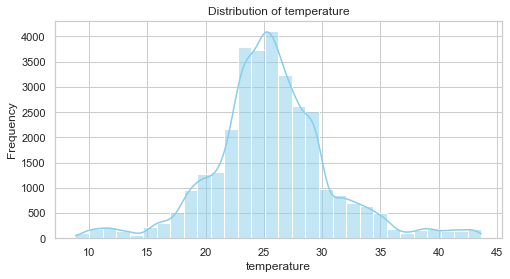

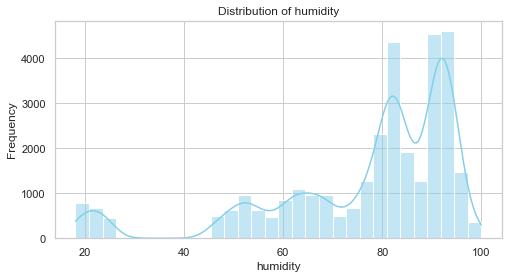

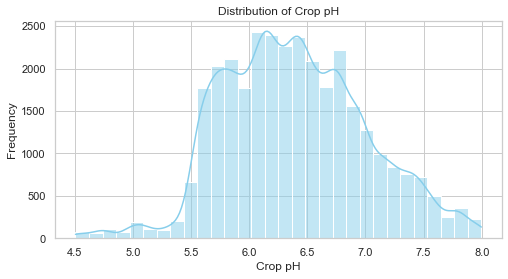

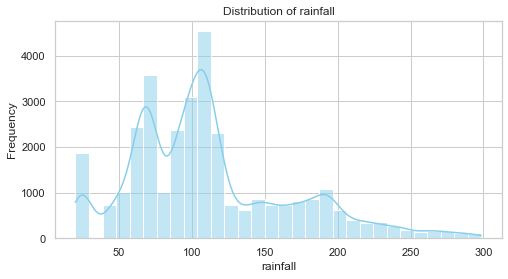

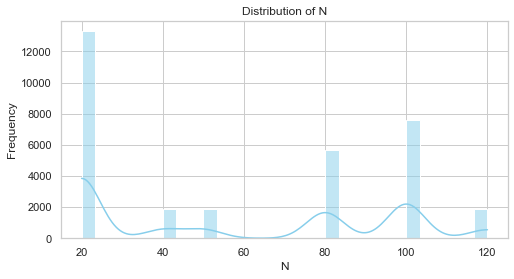

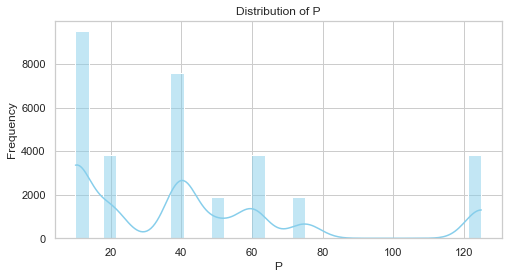

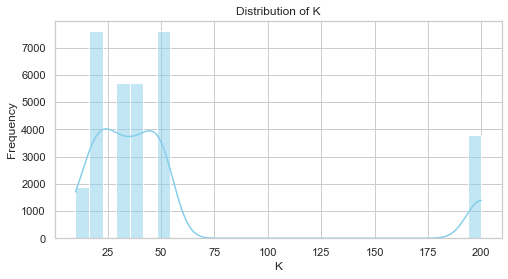

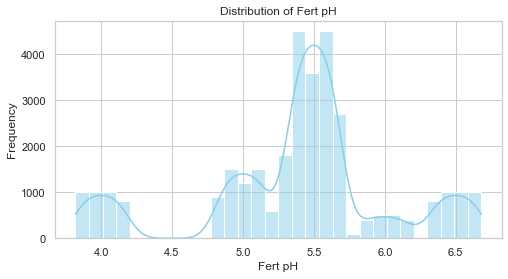

In [20]:
data = merged_df

# List of numerical columns for univariate analysis
numeric_columns = ['temperature', 'humidity', 'Crop pH', 'rainfall', 'N', 'P', 'K', 'Fert pH']

sns.set(style="whitegrid")

#Histograms for each numeric feature to check their distribution
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True, bins=30, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

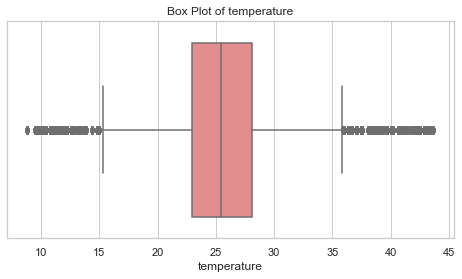

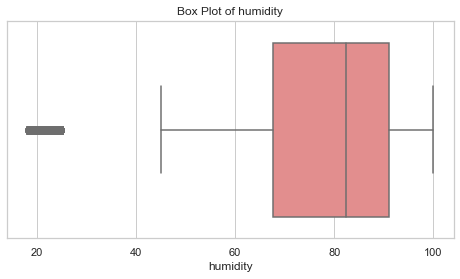

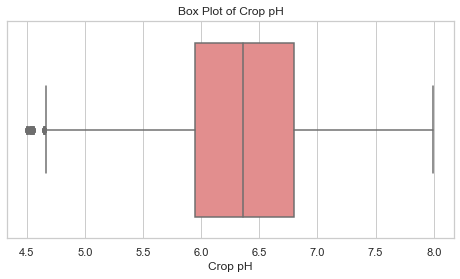

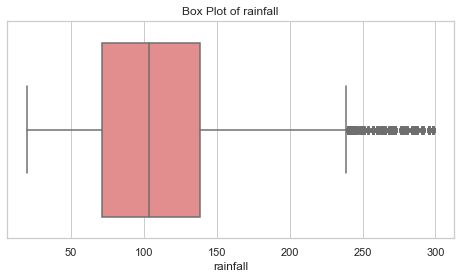

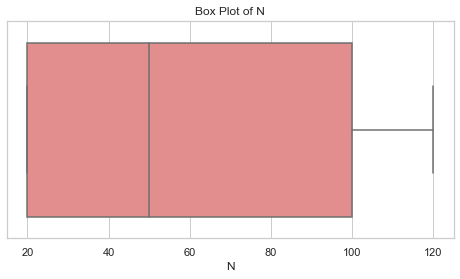

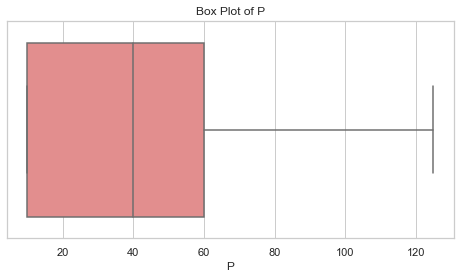

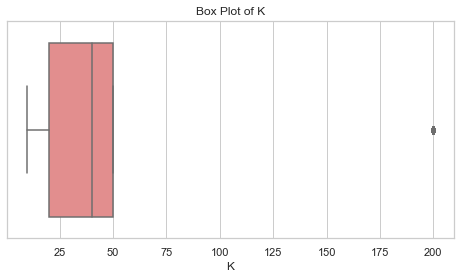

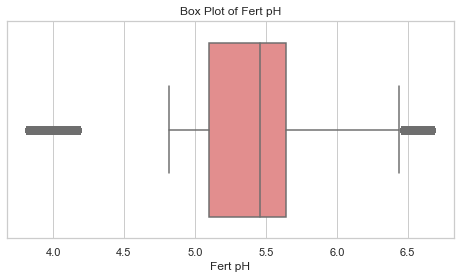

In [21]:
#Box plots to identify potential outliers in each numeric feature
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[col], color='lightcoral')
    plt.title(f"Box Plot of {col}")
    plt.xlabel(col)
    plt.show()